In [1]:
# импортируем все необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Экспоненциальноe распределениe

Сгенерируем из него выборку объёма 1000 и сравним гистограмму выборки и с теоретической плотностью распределения случайной величины.

In [6]:
# сгенерируем выборку объема 1000
expon = sts.expon()
data = expon.rvs(size=1000)

# расчитаем теоретическую плотность распределения случайной величины
x = np.linspace(0,15,1000)
pdf = expon.pdf(x) 

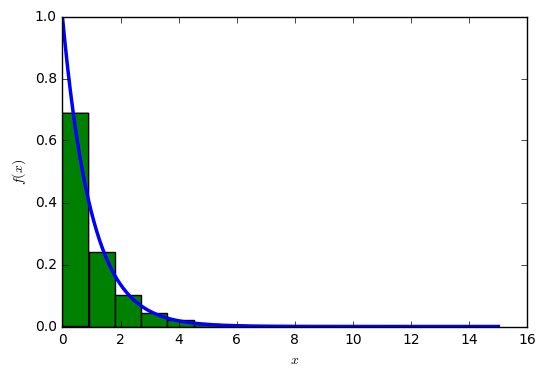

In [3]:
# постройм гистограмму выборки и нарисуум поверх неё теоретическую плотность распределения
plt.figure()
plt.plot(x, pdf, linewidth = 2.5)
plt.hist(data, bins=10, normed=True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

Вывод: как видно на графике выше, гистограмма выборки хорошо совпадает с теоретической оценкой плотности вероятности рассматриваемого распределения.


#### Распределение выборочных средних

В случае экспоненциального распределения: $\mathbb{E}X = \lambda^{-1}\, = 1$ - математическое ожидание, $\mathbb{D}X = \lambda^{-2}\, = 1$ - дисперсия.

In [4]:
# опишем функцию, которая для объема выборки n генерирует график гистограммы выборочных средних случайной величины
# и теоретической оценки плотности вероятности для распределения выборочных средних

def generate_expon(n):
    # сгенерируем выборочные средние по выборкам объема n
    means = []
    for _ in range(1000):
        sample = expon.rvs(n)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
    
    # расчитаем теоритеческую плотность вероятности для нормального распределения
    mu = 1 # theoretical expectation
    sigma = (1./n) ** 0.5 # theoretical sigma
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,4,100)
    pdf = norm_rv.pdf(x)
    
    # построим гистограмму выборочных средних и наложим на нее теоретическую оценку плотности вероятности нормального распределения
    plt.plot(x, pdf, linewidth = 2.5)
    plt.hist(means, normed = True)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

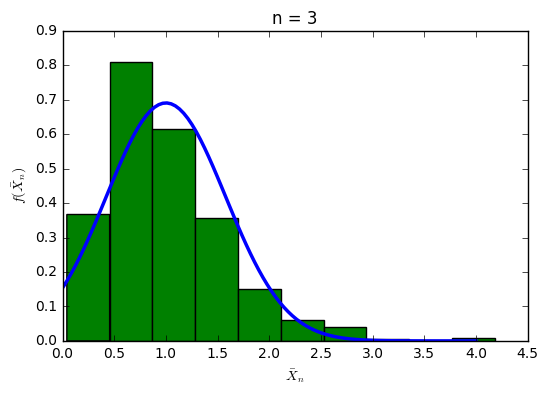

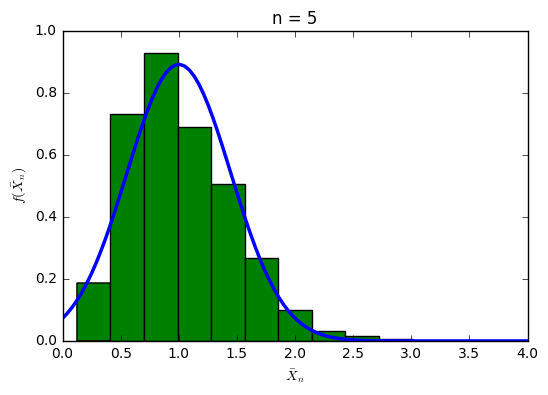

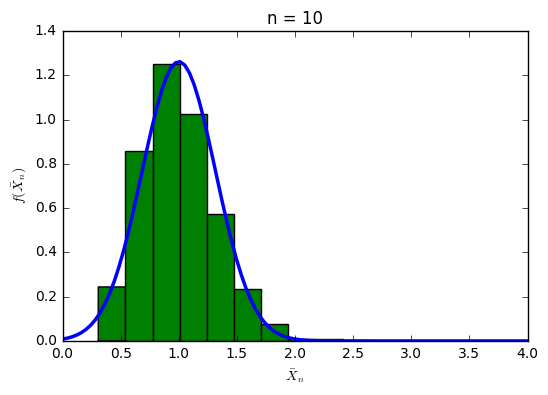

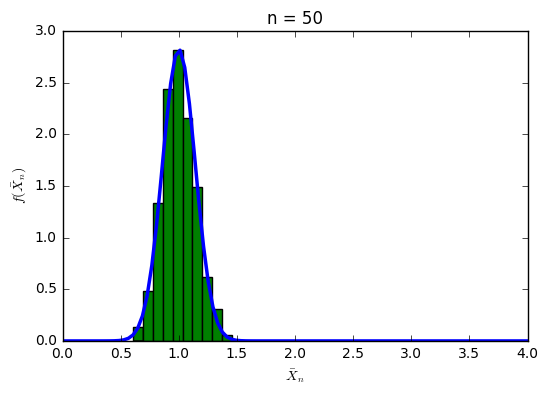

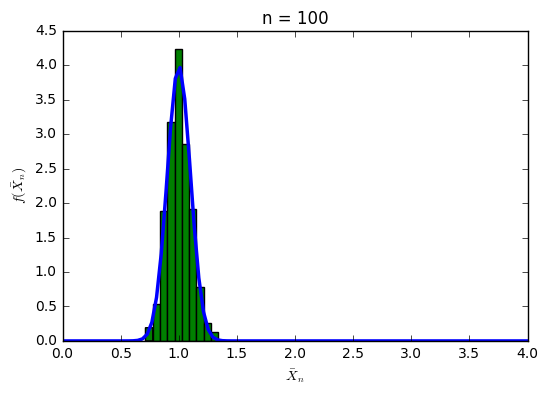

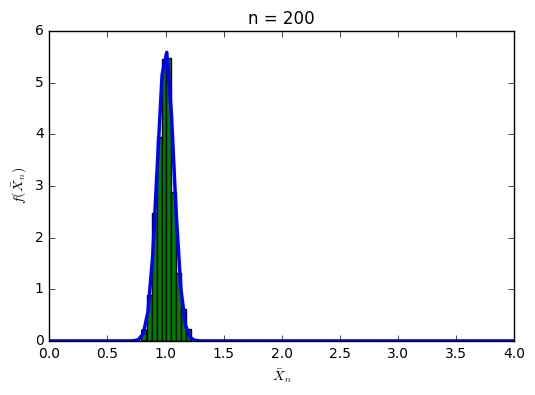

In [7]:
# построим гистограммы распределений выборочных средних и приближающих их нормальных распределений при различных объемах выборок n
for n in [3, 5, 10, 50, 100, 200]:
    generate_expon(n)

Вывод: чем больше объем выборки n, тем лучше распределение выборочных средних соответствует приближающему его нормальному распределению. При n=3 распределение несимметрично и совсем не похоже на нормальное, но уже при n=50 распределение выборочных средних достаточно хорошо соответсвует нормальному. С ростом n уменьшается дисперсия распределения выборочных средних.